In [59]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.svm import SVC, SVR
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC # SVM
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams["font.family"]="AppleGothic"
matplotlib.rcParams["axes.unicode_minus"]= False

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
wine = load_wine()

x_data = wine['data']
y_data = wine['target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.2, random_state = 11, stratify=y_data)

In [5]:
# SVC 핵심 파라미터 : C, kernel, gamma
model_wine = make_pipeline(StandardScaler(), SVC())
model_wine.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [8]:
model_wine.score(x_test, y_test)

0.9444444444444444

## 연습 : 피마인디안 데이터
- GridSearch를 통해 최적의 파라미터를 찾고, score 확인
- confusion matrix를 구하시요.


In [29]:
df = pd.read_csv('data/pima-indians-diabetes.data.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [30]:
x_data = df.drop('Outcome',axis=1)
y_data = df['Outcome']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
        test_size=0.2, stratify=y_data)

In [32]:
x_train.shape

(614, 8)

In [46]:
estimators = [('scaler',StandardScaler()),
              ('svc',SVC())]

pipe = Pipeline(estimators)              

param = {'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
         'svc__C':[i for i in range(1,10,10)],
         'svc__gamma':['scale', 'auto']}

gridSvc = GridSearchCV(pipe, param_grid=param, verbose=1)
gridSvc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.

In [47]:
# 최적의 파라미터
gridSvc.best_params_

{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [50]:
# score 확인
gridSvc.best_estimator_.score(x_test,y_test)

0.7597402597402597

### confusion matrix

In [56]:
import seaborn as sns

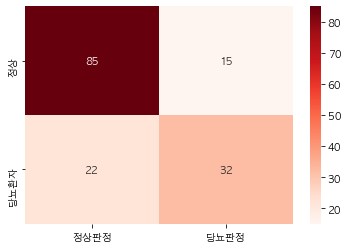

In [60]:
y_pred =  gridSvc.best_estimator_.predict(x_test)#판정
cm = metrics.confusion_matrix(y_test, y_pred)
# sns.heatmap( cm, annot=True, cmap='Reds')
sns.heatmap( cm, annot=True, cmap='Reds',
xticklabels=['정상판정','당뇨판정'],yticklabels=['정상','당뇨환자'] )
plt.show() 